In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [24]:
#data set (reslae Flat price) took from https://beta.data.gov.sg/collections/189/view
#
df1 = pd.read_csv("2000-2012formated.csv")
df1.head()
#refactor floor area town and flat type and flat model
# add house age
# total bathroom
# total bathrooms
# total rooms
# study or other areas
#latitude logi tude
#distance to school
#distance to MRT
#distance to mall
#number of malls

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2000-01,ANG MO KIO,3 ROOM,170,ANG MO KIO AVE 4,07 TO 09,69.0,Improved,1986,85,147000.0
1,2000-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,04 TO 06,61.0,Improved,1986,85,144000.0
2,2000-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,159000.0
3,2000-01,ANG MO KIO,3 ROOM,215,ANG MO KIO AVE 1,07 TO 09,73.0,New Generation,1976,75,167000.0
4,2000-01,ANG MO KIO,3 ROOM,218,ANG MO KIO AVE 1,07 TO 09,67.0,New Generation,1976,75,163000.0


In [38]:
df1.groupby('flat_model')['flat_model'].agg('count')

flat_model
2-room                        73
3Gen                          17
Adjoined flat               1139
Apartment                  22847
DBSS                        3032
Improved                  150066
Improved-Maisonette           74
Maisonette                 15537
Model A                   172596
Model A-Maisonette           991
Model A2                    9128
Multi Generation             238
New Generation             98251
Premium Apartment          40310
Premium Apartment Loft       101
Premium Maisonette            82
Simplified                 30531
Standard                   22591
Terrace                      406
Type S1                      423
Type S2                      209
Name: flat_model, dtype: int64

In [25]:
# check exsiting story ranges
df1.groupby('storey_range')['storey_range'].agg('count')

storey_range
01 TO 03    112387
04 TO 06    141323
07 TO 09    126843
10 TO 12    108515
13 TO 15     43140
16 TO 18     17630
19 TO 21      7829
22 TO 24      5134
25 TO 27      2565
28 TO 30      1422
31 TO 33       548
34 TO 36       503
37 TO 39       458
40 TO 42       223
43 TO 45        61
46 TO 48        45
49 TO 51        16
Name: storey_range, dtype: int64

In [26]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568642 entries, 0 to 568641
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                568642 non-null  object 
 1   town                 568642 non-null  object 
 2   flat_type            568642 non-null  object 
 3   block                568642 non-null  object 
 4   street_name          568642 non-null  object 
 5   storey_range         568642 non-null  object 
 6   floor_area_sqm       568642 non-null  float64
 7   flat_model           568642 non-null  object 
 8   lease_commence_date  568642 non-null  int64  
 9   remaining_lease      568642 non-null  int64  
 10  resale_price         568642 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 47.7+ MB


In [27]:
#remove null values
df1.dropna(inplace=True)

In [28]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568642 entries, 0 to 568641
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                568642 non-null  object 
 1   town                 568642 non-null  object 
 2   flat_type            568642 non-null  object 
 3   block                568642 non-null  object 
 4   street_name          568642 non-null  object 
 5   storey_range         568642 non-null  object 
 6   floor_area_sqm       568642 non-null  float64
 7   flat_model           568642 non-null  object 
 8   lease_commence_date  568642 non-null  int64  
 9   remaining_lease      568642 non-null  int64  
 10  resale_price         568642 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 47.7+ MB


In [29]:
#set X without resale_price and create Y with resale_price
from sklearn.model_selection import train_test_split
X = df1.drop('resale_price',axis=1)
Y = df1['resale_price']

In [30]:
# set x train and test y train and test dats sets
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)

In [31]:
train_data = X_train.join(Y_train)

In [32]:
train_data

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
329659,2010-07,SEMBAWANG,5 ROOM,313,SEMBAWANG DR,16 TO 18,120.0,Improved,1999,88,433000.0
493401,2020-12,PUNGGOL,5 ROOM,162A,PUNGGOL CTRL,01 TO 03,114.0,Premium Apartment,2004,82,468000.0
18204,2000-07,QUEENSTOWN,3 ROOM,29,TANGLIN HALT RD,01 TO 03,52.0,Standard,1970,69,117000.0
438342,2018-07,PASIR RIS,5 ROOM,555,PASIR RIS ST 51,07 TO 09,124.0,Improved,1992,73,470000.0
525216,2022-01,SENGKANG,4 ROOM,409B,FERNVALE RD,16 TO 18,95.0,Premium Apartment,2004,82,465000.0
...,...,...,...,...,...,...,...,...,...,...,...
299741,2009-09,TAMPINES,EXECUTIVE,739,TAMPINES ST 72,04 TO 06,140.0,Apartment,1997,87,458000.0
533660,2022-05,QUEENSTOWN,3 ROOM,33,GHIM MOH LINK,19 TO 21,68.0,Model A,2018,95,665000.0
105595,2002-11,TAMPINES,4 ROOM,487C,TAMPINES ST 45,04 TO 06,105.0,Model A,1990,87,240000.0
443712,2018-10,BEDOK,3 ROOM,107,BEDOK NTH RD,01 TO 03,82.0,New Generation,1977,57,310000.0


array([[<AxesSubplot: title={'center': 'floor_area_sqm'}>,
        <AxesSubplot: title={'center': 'lease_commence_date'}>],
       [<AxesSubplot: title={'center': 'remaining_lease'}>,
        <AxesSubplot: title={'center': 'resale_price'}>]], dtype=object)

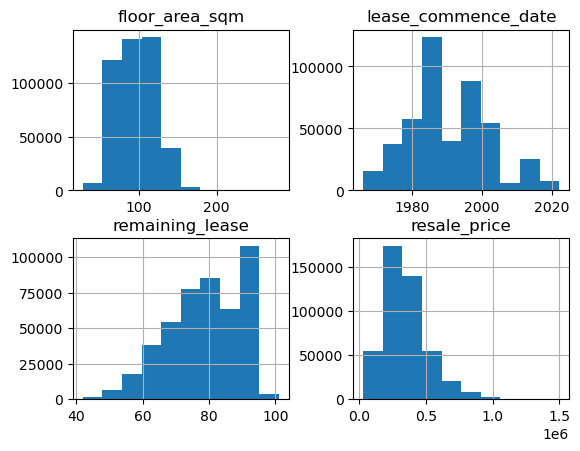

In [33]:
train_data.hist()

array([[<AxesSubplot: title={'center': 'floor_area_sqm'}>,
        <AxesSubplot: title={'center': 'lease_commence_date'}>],
       [<AxesSubplot: title={'center': 'remaining_lease'}>,
        <AxesSubplot: title={'center': 'resale_price'}>]], dtype=object)

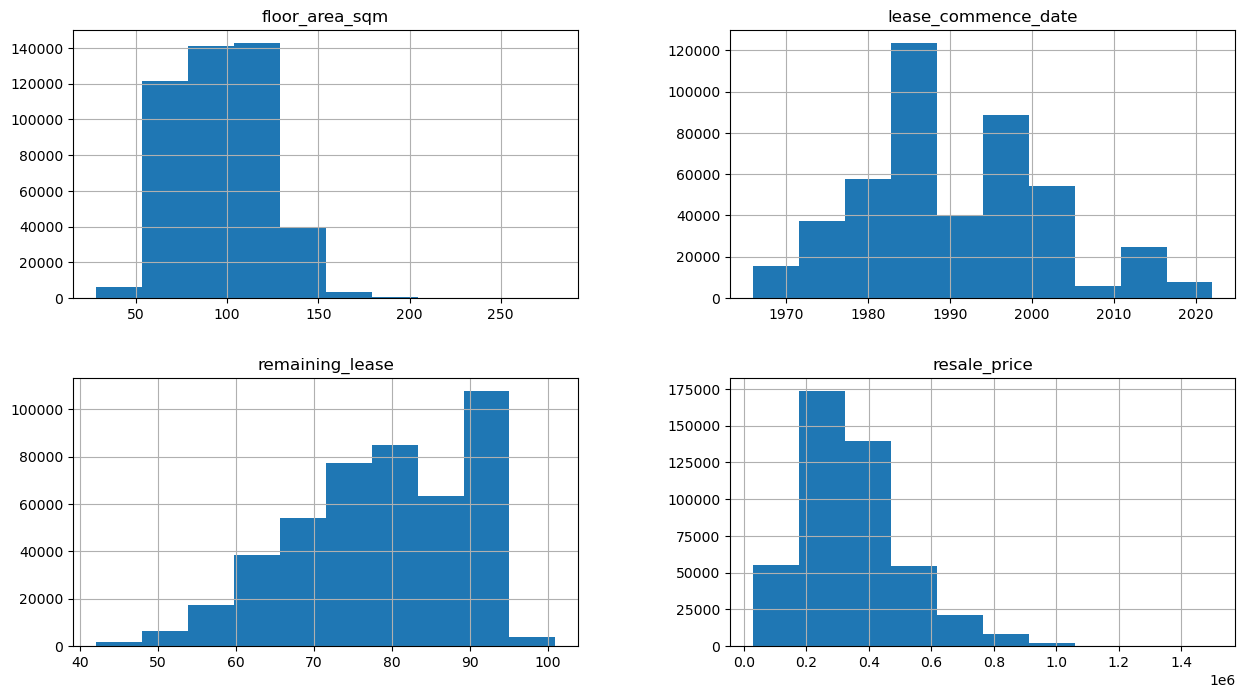

In [34]:
train_data.hist(figsize=(15,8))

In [35]:
#corelation metrix
train_data.corr()

,floor_area_sqm,lease_commence_date,remaining_lease,resale_price
floor_area_sqm,1.000000,0.367609,0.353040,0.530486
lease_commence_date,0.367609,1.000000,0.779233,0.483004
remaining_lease,0.353040,0.779233,1.000000,0.049516
resale_price,0.530486,0.483004,0.049516,1.000000


<AxesSubplot: >

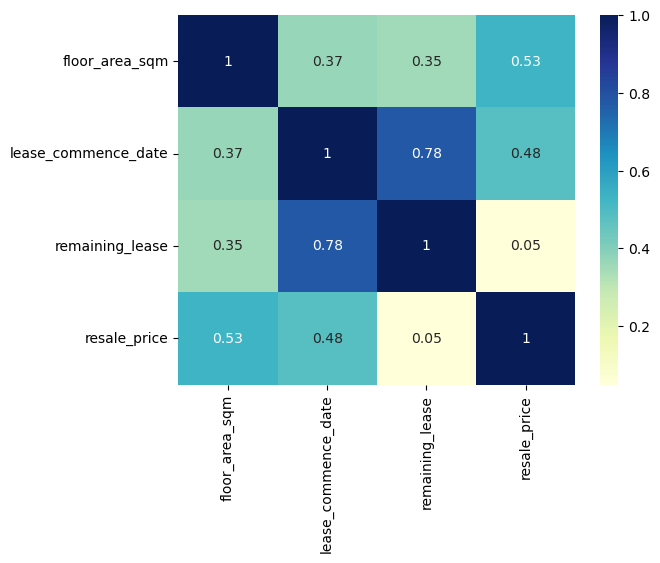

In [37]:
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")